In [15]:
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

df = pd.read_csv ("Result_MeTel.txt", sep = "\t", index_col = 0 )
df = df.apply(lambda x: np.power(10, x))
for i in range (len(df)):
    df.iloc[i][i] = 1
df = df.round(2)
df

,Dura,FFT,PCT,PFT,PP,PT
Dura,1.00,0.25,0.15,0.25,0.02,0.25
FFT,0.25,1.00,0.15,0.41,0.02,0.36
PCT,0.15,0.15,1.00,0.15,0.02,0.15
PFT,0.25,0.41,0.15,1.00,0.02,0.36
PP,0.02,0.02,0.02,0.02,1.00,0.02
PT,0.25,0.36,0.15,0.36,0.02,1.00


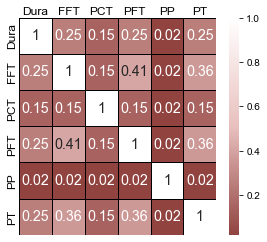

In [27]:
plt.rcParams["font.family"] = 'arial'
fig, ax = plt.subplots ( nrows = 1, ncols = 1, figsize =(4.5, 4.5))

colors = [ "#914340", "#E8C0BE", "white"]
positions = [0, 0.5, 1]  # Define the positions for each color
# Create the colormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', list(zip(positions, colors)))

fig.subplots_adjust ( wspace = 0.4, bottom = 0.03, top = 0.7, left = 0.22, right = 0.98)
fig.set_facecolor('white')

sns.heatmap ( df , cmap = cmap, linewidths = 0.5, linecolor = "black", annot = df, annot_kws={"size": 35 / np.sqrt(len( df))} )   # fmt=".2f", 
#fig.suptitle ( title, fontsize = 12, fontweight = "bold", ha = "left", x = 0 )
ax.set_xticklabels( ax.get_xticklabels(),  ha = 'center' )
ax.tick_params(axis = 'x',  pad = -2.5)
ax.set_yticklabels( [ i.get_text().replace( "_Multiplex.sorted" , "" ) for i in ax.get_yticklabels()], va = 'center' )
ax.tick_params(axis = 'y', pad = -1.5 )

plt.tick_params(axis='both', which='major', labelsize = 12, left = False, labelbottom = False, bottom=False, top = False, labeltop=True)


fig.savefig ( "/data/project/Meningioma/script/03.Variant_calling&Annotation/MeTel.heatmap.pdf", dpi = 300)